In [1]:
__depends__ = ["../outputs/eta_anomaly_var_wavenumber_freq_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_april.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_all.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_april.npz",
               "../outputs/ke__wavenumber_freq_4320_october.npz",
               "../outputs/ke__wavenumber_freq_4320_april.npz",
               "../outputs/ke__wavenumber_freq_4320_all.npz",
               "../WOA/radii_min.npz",
                "../WOA/radii_max.npz",
               "../WOA/radii.npz",
              '../outputs/llc_kuroshio_spectra.nc']
__dest__ = ['../writeup/figs/fig4.pdf','../writeup/figs/figS7.pdf']

In [2]:
__figpath__ = 'figs/'

# Plots wavenumber-frequency KE and SSH variance spectra

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal

from netCDF4 import Dataset

import cmocean
import seawater as sw

from pyspec import spectrum

%matplotlib inline

In [4]:
speco = np.load(__depends__[0])
speca = np.load(__depends__[1])
spec = np.load(__depends__[2])
speco4320 = np.load(__depends__[3])
speca4320 = np.load(__depends__[4])
kespeco4320 = np.load(__depends__[5])
kespeca4320 = np.load(__depends__[6])
kespec4320 = np.load(__depends__[7])
radii = np.load(__depends__[-2])['radii']
radii_min = np.load(__depends__[-4])['radii']
radii_max = np.load(__depends__[-3])['radii']
llc = Dataset(__depends__[-1])

In [5]:
c1 = 'slateblue'
c2 = 'tomato'
c3 = 'k'
c4 = 'indigo'
plt.rcParams['lines.linewidth'] = 2.5

def leg_width(lg,fs):
    """"  Sets the linewidth of each legend object """
    for legobj in lg.legendHandles:
        legobj.set_linewidth(fs)
        
def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,250.,100.,50.,25.,10.])
    lp=np.array([500,250,100,50,25,10])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
def set_axes(type='ke'):
    if type=='ke':
        plt.loglog(kr,12.*e2,'.5',linewidth=2)
        plt.loglog(kr,35*e3,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-3,1.e2)
        plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')

    elif type=='ssha':
        plt.loglog(kr,e2/.5e1,'.5',linewidth=2)
        plt.loglog(kr,3*e5/1.5e2,'.5',linewidth=2)
        plt.xlim(.75e-3,1/3.)
        plt.ylim(1.e-6,1.e2)
        plt.ylabel(r'SSH variance density [m$^2$/cpkm]')   
    
    plt.xlabel(r'Wavenumber [cpkm]')


In [6]:
f,ki = speco['f'],spec['ki']
Eetao = speco['iEeta']
Eetaa = speca['iEeta']
Eeta = spec['iEeta']

In [7]:
f, Eetao, Eetaa, Eeta = f[1:f.size/2], Eetao[:,1:f.size/2],Eetaa[:,1:f.size/2], Eeta[:,1:f.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [8]:
f0 = sw.f(32.5)
fmin, fmax = sw.f(25), sw.f(40.)


#f0 = sw.f(32.69)
N2 = (276.32*f0)**2

m = (1./150)
m2 = (1./500)
m3 = (1./550)
m4 = (1./1500)

k = np.logspace(-3,-1,100)

omg = np.sqrt(f0**2 + N2*((k/m)**2))*3600/2/np.pi
omg2 = np.sqrt(f0**2 + N2*((k/m2)**2))*3600/2/np.pi
omg3 = np.sqrt(f0**2 + N2*((k/m3)**2))*3600/2/np.pi
omg4 = np.sqrt(f0**2 + N2*((k/m4)**2))*3600/2/np.pi

rd1 = 2*np.pi*radii[0]
rd2 = 2*np.pi*radii[1]
rd3 = 2*np.pi*radii[2]
rd4 = 2*np.pi*radii[3]
rd5 = 2*np.pi*radii[4]

rd1_min = 2*np.pi*radii_min[0]
rd4_min = 2*np.pi*radii_min[3]
rd1_max = 2*np.pi*radii_max[0]
rd4_max = 2*np.pi*radii_max[3]

rd0 = 2000  #  external deformation radius (km)
omg_0 = f0*np.sqrt(1 + (k*rd0)**2)*3600/2/np.pi

omg_1 = f0*np.sqrt(1 + (k*rd1)**2)*3600/2/np.pi
omg_2 = f0*np.sqrt(1 + (k*rd2)**2)*3600/2/np.pi
omg_3 = f0*np.sqrt(1 + (k*rd3)**2)*3600/2/np.pi
omg_4 = f0*np.sqrt(1 + (k*rd4)**2)*3600/2/np.pi
omg_5 = f0*np.sqrt(1 + (k*rd5)**2)*3600/2/np.pi

omg_1_min = fmin*np.sqrt(1 + (k*rd1_min)**2)*3600/2/np.pi
omg_4_min = fmin*np.sqrt(1 + (k*rd4_min)**2)*3600/2/np.pi

omg_1_max = fmax*np.sqrt(1 + (k*rd1_max)**2)*3600/2/np.pi
omg_4_max = fmax*np.sqrt(1 + (k*rd4_max)**2)*3600/2/np.pi

m2 = 1./12.4
f0 = f0*3600/(2*np.pi)
fmin = fmax*3600/(2*np.pi)
fmax = fmin*3600/(2*np.pi)

In [9]:
RatioEeta = Eetao.T/Eetaa.T
RatioEeta = np.ma.masked_array(RatioEeta,Eetao.T<1.e-2)

In [10]:
def plt_freqs():
    plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
    plt.text(1./150,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=34.5)
    plt.text(1./37.5,.28,r'mode 4, 25$^\circ$N',fontsize=11,rotation=36)
    plt.plot([1.e-3,1.e-1],[f0,f0],'k--',linewidth=1)
    plt.plot([1.e-3,1.e-1],[m2,m2],'k--',linewidth=1)
    plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--',linewidth=1)
    plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
    plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
    plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)

# SSH variance

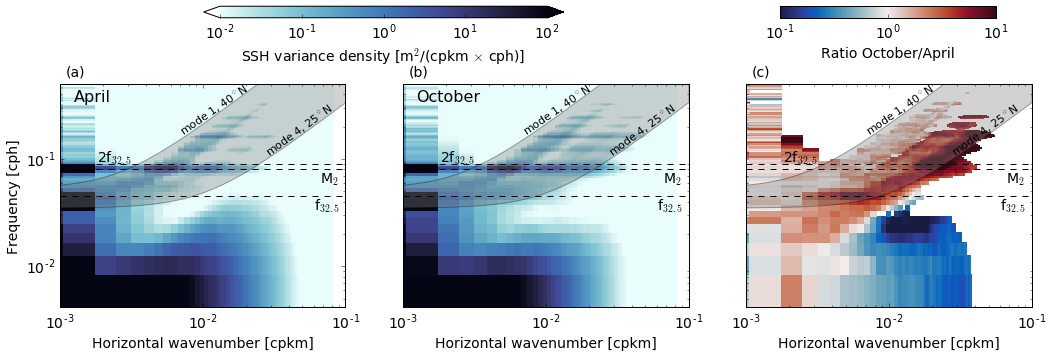

In [11]:
vmin, vmax = 1.e-2, 1.e2

fig = plt.figure(figsize=(20,4))

ax = plt.subplot(131)
plt.pcolormesh(ki,f,Eetaa.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)
plt.text(1.1e-3,.6,'(a)',fontsize=14)
plt.text(1/800,.35,'April',color='k',fontsize=16)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki,f,Eetao.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.yticks([])
plt.text(1/800,.35,'October',color='k',fontsize=16)
plt.text(1.1e-3,.6,'(b)',fontsize=14)

ax = plt.subplot(133)
cratio = plt.pcolormesh(ki,f,RatioEeta,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt_freqs()
plt.text(1.1e-3,.6,'(c)',fontsize=14)

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.625, 1.13, 0.15, 0.04])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April',orientation='horizontal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.13, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')

#plt.savefig(__dest__[0],dpi=100,bbox_inches='tight')

In [12]:
L, T = 1./ki, 1./f

fLsub = L < 100
fTsub = T < 1./f0


SSHvaro = Eetao[fLsub][...,fTsub].sum()
SSHvara = Eetaa[fLsub][...,fTsub].sum()

(SSHvaro-SSHvara)/SSHvaro

0.66610942100452908

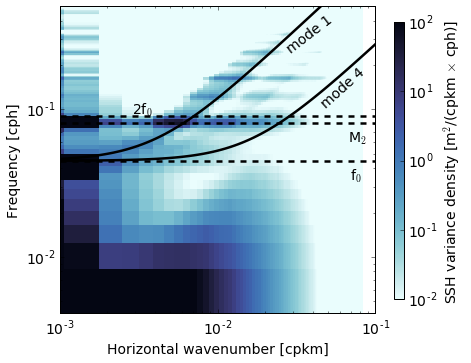

In [13]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki,f,Eeta.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.plot(k,omg_1,'k')
plt.plot(k,omg_4,'k')
plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
plt.text(1./23,.17,r'mode 4',fontsize=14,rotation=42)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_TimeAveraged.pdf",dpi=100,bbox_inches='tight')

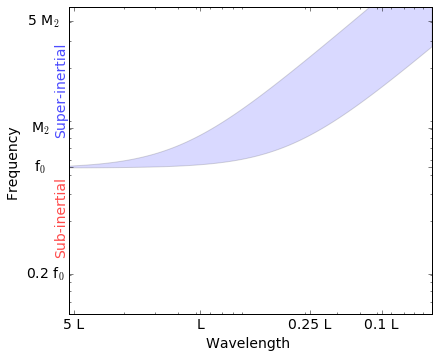

In [14]:
# plot the frame for schematics...
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
#plt.plot(k,omg_3,'k')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(5.e-3,.5)
plt.fill_between(k, omg_4, omg_1, facecolor='b',alpha=.15)
f0, m2 = 1/22.,1./12.4
Ld = 2*np.pi*30.
plt.yticks([0.2*f0,f0,m2,5*m2],[r"0.2 f$_0$",r"f$_0$     ",r"M$_2$    ", r"5 M$_2$  "])
plt.xticks([1/Ld/5,1./Ld,1/Ld/0.25,1/Ld/.1],["5 L","L","0.25 L","0.1 L"])
plt.xlabel("Wavelength ")
plt.ylabel("Frequency ")

plt.text(.825e-3,1./4,"Super-inertial",rotation="vertical",
         fontsize=14,color='blue',alpha=.7)
plt.text(.825e-3,1./30,"Sub-inertial",rotation="vertical",
         fontsize=14,color='red',alpha=.7)

plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_frame.pdf",dpi=100,bbox_inches='tight')

## LLC4320, 1/48$^\circ$

In [15]:
f4320,ki4320 = speco4320['f'],speco4320['ki']
Eetao4320 = speco4320['iEeta']
Eetaa4320 = speca4320['iEeta']

In [16]:
f4320, Eetao4320, Eetaa4320 = f4320[1:f4320.size/2], Eetao4320[:,1:f4320.size/2],Eetaa4320[:,1:f4320.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [17]:
RatioEeta4320 = Eetao4320.T/Eetaa4320.T
RatioEeta4320 = np.ma.masked_array(RatioEeta4320,Eetao4320.T<1.e-2)

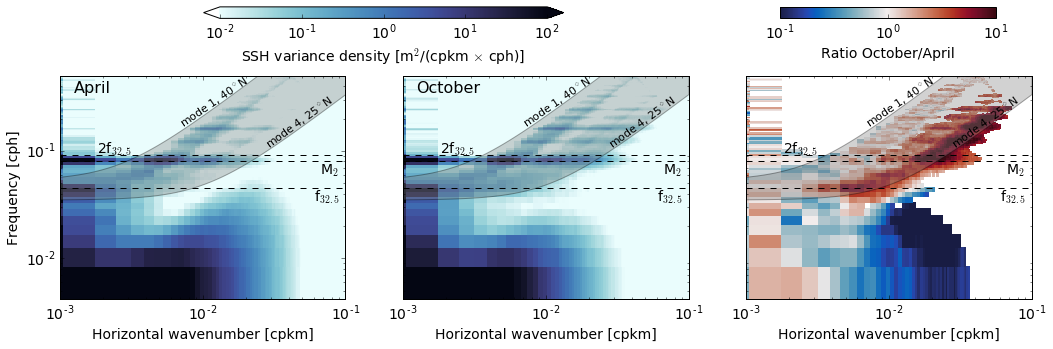

In [18]:
vmin, vmax = 1.e-2, 1.e2

fig = plt.figure(figsize=(20,4))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)

plt.text(1/800,.35,'April',color='k',fontsize=16)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.yticks([])
plt.text(1/800,.35,'October',color='k',fontsize=16)

ax = plt.subplot(133)
cratio = plt.pcolormesh(ki4320,f4320,RatioEeta4320,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt_freqs()
    
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.625, 1.1, 0.15, 0.04])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April',orientation='horizontal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.1, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')
plt.savefig(__dest__[0],dpi=100,bbox_inches='tight')

In [19]:
L, T = 1./ki4320, 1./f4320

fLsub = L < 100
fTsub = T < 1./f0

fTnsub = T > 1.2/f0


SSHvaro = Eetao4320[fLsub][...,fTsub].sum()
SSHvara = Eetaa4320[fLsub][...,fTsub].sum()

(SSHvaro-SSHvara)/SSHvaro

0.65802332924821516

In [20]:
N = 10 # there are about 15 independent realizations of the wavenumber-frequency
       # spectrum at the 2 x f --- less at low frequencies/low wavenumbers,
       # more at high frequencies/high wavenumbers

Ns = np.ones_like(ki4320)*N

ssh_k_s = np.ones_like(ki4320)*1.e-5
ke_k_s = np.ones_like(ki4320)*3.e-3

Ns[1./ki4320 > 200] = N/8
Ns[(1./ki4320 < 200) & (1./ki4320 > 100)] = N/4
Ns[(1./ki4320 < 100) & (1./ki4320 > 50)] = N/2
Ns[(1./ki4320 < 25)] = 2*N

ssh_k_l, ssh_k_u = spectrum.spec_error(ssh_k_s,sn=Ns)
ke_k_l, ke_k_u = spectrum.spec_error(ke_k_s,sn=Ns)

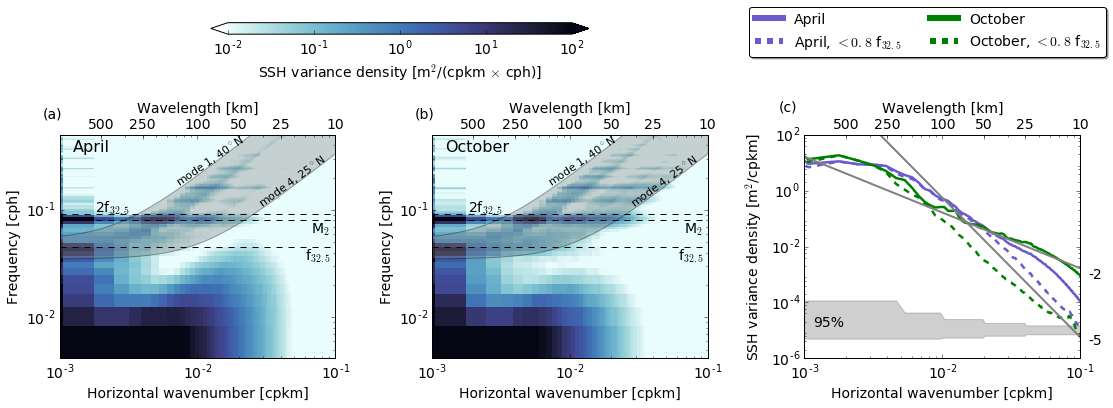

In [21]:
vmin, vmax = 1.e-2, 1.e2

fig = plt.figure(figsize=(21,4.))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)
add_second_axis(ax)

plt.text(1/800,.35,'April',color='k',fontsize=16)
plt.text(.75e-3,1/1.4,'(a)',fontsize=14)

#add_second_axis(ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
#plt.xlim(1.e-3,1/3.)

plt.ylim(0,.5)
#plt.yticks([])
plt.ylabel("Frequency [cph]")

plt.text(1/800,.35,'October',color='k',fontsize=16)
add_second_axis(ax)
plt.text(.75e-3,1/1.4,'(b)',fontsize=14)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=None)


ax = plt.subplot(133)

kr = np.array([1.e-4,1.])
e2 = kr**-2/1.e4
e3 = kr**-3/1.e7
e5 = kr**-5/1.e9
df = f[1]

plt.loglog(ki4320,Eetaa4320[:,:].sum(axis=1)*df,color=c1,label='April')
plt.loglog(ki4320,Eetaa4320[:,fTnsub].sum(axis=1)*df,'--',color=c1,label='April, $< 0.8$ f$_{32.5}$')
plt.loglog(ki4320,Eetao4320[:,:].sum(axis=1)*df,color='g',label='October')
plt.loglog(ki4320,Eetao4320[:,fTnsub].sum(axis=1)*df,'--',color='g',label='October, $< 0.8$ f$_{32.5}$')


plt.fill_between(ki4320,ssh_k_l, ssh_k_u, color='.25', alpha=0.25)
plt.text(1.15e-3,1.4e-5,'95%',fontsize=14)

plt.text(1.15e-1,7.e-4,'-2',fontsize=14)
plt.text(1.15e-1,.3e-5,'-5',fontsize=14)

plt.loglog(kr,e2/.6e1,'.5',linewidth=2)
plt.loglog(kr,8.5*e5/1.5e2,'.5',linewidth=2)
plt.xlim(1.e-3,1e-1)
plt.ylim(1.e-5,1.e2)
plt.xlabel(r'Horizontal wavenumber [cpkm]')
plt.ylabel(r'SSH variance density [m$^2$/cpkm]')
#plt.text(3.e-2, 14, "SSH variance", size=16, rotation=0.,
#         ha="center", va="center",
#         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(1.e-6,1.e2)
plt.text(.65e-3,700.,'(c)',fontsize=14)
plt.yticks([1.e-6,1.e-4,1.e-2,1.e0,1e2])
add_second_axis(ax)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.25, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')

lg = ax.legend(loc=(-0.2,1.35), ncol=2, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

plt.savefig(__dest__[0],dpi=100,bbox_inches='tight')

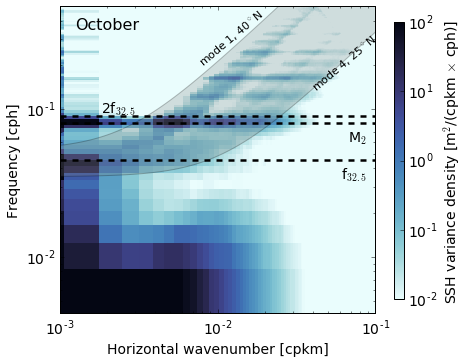

In [22]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.25)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'October',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_October.pdf",dpi=100,bbox_inches='tight')

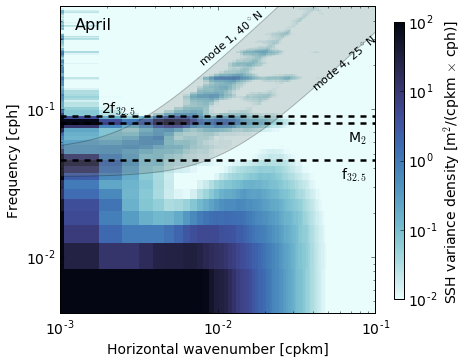

In [23]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.25)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'April',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_April.pdf",dpi=100,bbox_inches='tight')

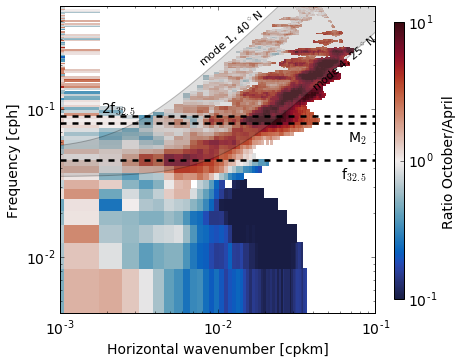

In [24]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,RatioEeta4320,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.25)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April')

plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_Ratio.pdf",dpi=100,bbox_inches='tight')

# KE

## LLC4320, 1/48$^\circ$

In [25]:
f4320,ki4320 = kespeco4320['f'],kespeco4320['ki']
Eo4320 = kespeco4320['iE']
Ea4320 = kespeca4320['iE']
E4320 = kespec4320['iE']

In [26]:
f4320, Eo4320, Ea4320, E4320 = f4320[1:f4320.size/2], Eo4320[:,1:f4320.size/2],Ea4320[:,1:f4320.size/2], E4320[:,1:f4320.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [27]:
vmin, vmax = 1e-1, 1.e4

In [28]:
label_KEspec = r'KE density [(m$^2$ s$^{-2}$)/(cpkm $\times$ cph)]'

In [29]:
L, T = 1./ki, 1./f

fLsub = L < 100
fTsub = T < 1./f0

KEo = Eo4320[fLsub][...,fTsub].sum()
KEa = Ea4320[fLsub][...,fTsub].sum()

(KEo-KEa)/KEo

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117
/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 234 but corresponding boolean dimension is 117


0.63010499316269519

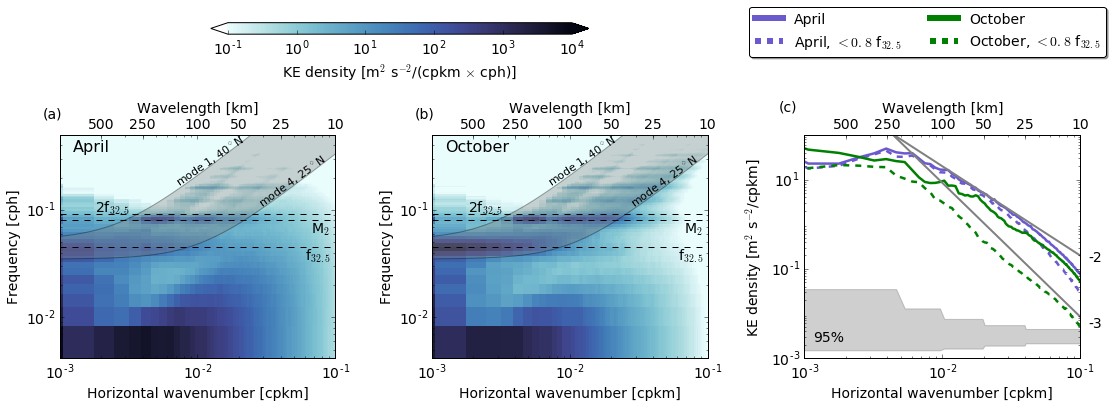

In [30]:
vmin, vmax = 1.e-1, 1.e4

fig = plt.figure(figsize=(21,4.))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Ea4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)
add_second_axis(ax)

plt.text(1/800,.35,'April',color='k',fontsize=16)
plt.text(.75e-3,1/1.4,'(a)',fontsize=14)

#add_second_axis(ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eo4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
#plt.xlim(1.e-3,1/3.)

plt.ylim(0,.5)
#plt.yticks([])
plt.ylabel("Frequency [cph]")

plt.text(1/800,.35,'October',color='k',fontsize=16)
add_second_axis(ax)
plt.text(.75e-3,1/1.4,'(b)',fontsize=14)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=None)


ax = plt.subplot(133)

kr = np.array([1.e-4,1.])
e2 = kr**-2/1.e4
e3 = kr**-3/1.e7
e5 = kr**-5/1.e9
df = f[1]

plt.loglog(ki4320,Ea4320[:,:].sum(axis=1)*df,color=c1,label='April')
plt.loglog(ki4320,Ea4320[:,fTnsub].sum(axis=1)*df,'--',color=c1,label='April, $< 0.8$ f$_{32.5}$')
plt.loglog(ki4320,Eo4320[:,:].sum(axis=1)*df,color='g',label='October')
plt.loglog(ki4320,Eo4320[:,fTnsub].sum(axis=1)*df,'--',color='g',label='October, $< 0.8$ f$_{32.5}$')


plt.fill_between(ki4320,ke_k_l, ke_k_u, color='.25', alpha=0.25)
plt.text(1.15e-3,2.4e-3,'95%',fontsize=14)


plt.loglog(kr,20.*e2,'.5',linewidth=2)
plt.loglog(kr,85*e3,'.5',linewidth=2)
plt.text(1.15e-1,1.5e-1,'-2',fontsize=14)
plt.text(1.15e-1,.5e-2,'-3',fontsize=14)

plt.xlim(1.e-3,1e-1)
plt.ylim(1.e-5,1.e2)
plt.xlabel(r'Horizontal wavenumber [cpkm]')
plt.ylabel(r'KE density [m$^2$ s$^{-2}$/cpkm]')
#plt.text(3.e-2, 14, "SSH variance", size=16, rotation=0.,
#         ha="center", va="center",
#         bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(1.e-3,1.e2)
plt.text(.65e-3,340.,'(c)',fontsize=14)
plt.yticks([1.e-3,1.e-1,1.e1])
add_second_axis(ax)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.25, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'KE density [m$^2$ s$^{-2}$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')

lg = ax.legend(loc=(-0.2,1.35), ncol=2, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)

plt.savefig(__dest__[1],dpi=100,bbox_inches='tight')

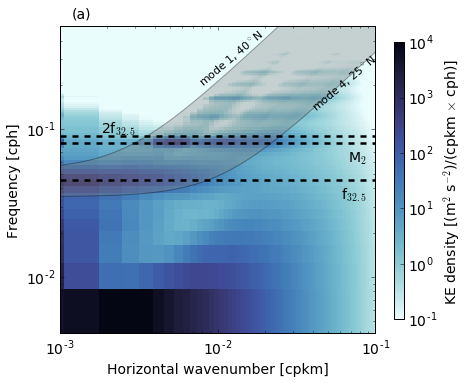

In [31]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,E4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)

plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)


ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")

plt.text(1.2e-3,.575,'(a)',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=label_KEspec)
plt.savefig(__figpath__+"KE_Wavenumber-Frequency_Spectrum_4320.pdf",dpi=100,bbox_inches='tight')

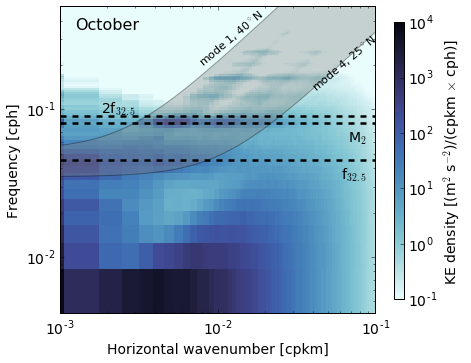

In [32]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Ea4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)

plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
plt.text(1/800,.35,'October',color='k',fontsize=16)


ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=label_KEspec)
#plt.savefig(__figpath__+"KE_Wavenumber-Frequency_Spectrum_4320_april.pdf",dpi=100,bbox_inches='tight')

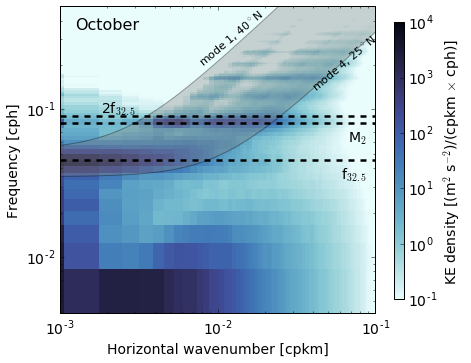

In [33]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Eo4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)

plt.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
plt.text(1./135,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
plt.text(1./26,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
plt.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
plt.text(1/800,.35,'October',color='k',fontsize=16)

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=label_KEspec)

plt.savefig(__figpath__+"KE_Wavenumber-Frequency_Spectrum_4320_october.pdf",dpi=100,bbox_inches='tight')

In [34]:
# integrate the spectrum


In [35]:
dk, df = ki4320[1],f4320[1]

ifsub = f4320<0.8*sw.f(32.5)*3600/2/np.pi
iksub = ki4320<1/100.

ke_k = E4320.sum(axis=1)*df
ke_f = E4320.sum(axis=0)*dk


ke_k_sub = E4320[:,ifsub].sum(axis=1)*df
ke_k_super = E4320[:,~ifsub].sum(axis=1)*df



ke_f_sub = E4320[iksub,:].sum(axis=0)*dk
ke_f_super = E4320[~iksub,:].sum(axis=0)*dk

In [36]:
N = 13*30/10  # number of spectral realizations for one-dimensional spectra at small scales (13 months of simulation...calculate spectral estimate every 10 days)

In [37]:
Ns = np.ones_like(ki4320)*N
Nf = np.ones_like(f4320)*N

ke_k_s = np.ones_like(ki4320)*3.e-3
ke_f_s = np.ones_like(f4320)*3.e-3

Nf[1./f4320 > 24*3] = N/8
Nf[(1./f4320 < 24*3) & (1./f4320 > 24*1)] = N/4
Nf[(1./f4320 <= 24*1) & (1./f4320 > 24*.5)] = N/2
Nf[(1./f4320 <= 24*.25) ] = 2*N

Ns[1./ki4320 > 200] = N/8
Ns[(1./ki4320 < 200) & (1./ki4320 > 100)] = N/4
Ns[(1./ki4320 < 100) & (1./ki4320 > 50)] = N/2
Ns[(1./ki4320 < 25)] = 2*N

ke_k_l, ke_k_u = spectrum.spec_error(ke_k_s,sn=Ns)
ke_f_l, ke_f_u = spectrum.spec_error(ke_f_s,sn=Nf)

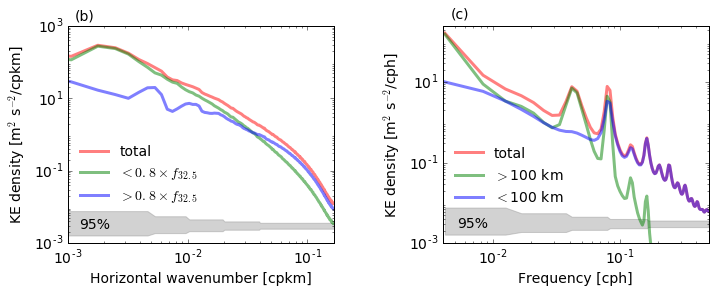

In [38]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)

ax1.fill_between(ki4320,ke_k_l,ke_k_u,color='.5',alpha=.35)

ax1.loglog(ki4320,2*ke_k,label='total',color='r',linewidth=3, alpha=.5) # multiply by 2 since we're just integrating half of the spec
ax1.loglog(ki4320,2*ke_k_sub,label=r'$<0.8\times f_{32.5}$',color='g',linewidth=3,alpha=.5)
ax1.loglog(ki4320,2*ke_k_super,label=r'$>0.8\times f_{32.5}$',color='b',linewidth=3,alpha=.5)
ax1.set_yticks([1.e-3,1.e-1,1e1,1e3])

ax1.set_xlim(1/1e3,1/6.)
plt.legend(loc=(.025,.15))
ax1.set_xlabel("Horizontal wavenumber [cpkm]")
ax1.set_ylabel(r"KE density [m$^2$ s$^{-2}$/cpkm]")
ax1.text(1.15e-3,1.5e3,'(b)',fontsize=14)
ax1.text(1.24e-3,2.5e-3,'95%',fontsize=14)
fig.subplots_adjust(wspace=2.)


ax1 = fig.add_subplot(122)
ax1.fill_between(f4320,ke_f_l,ke_f_u,color='.5',alpha=.35)
plt.loglog(f4320,2*ke_f,label='total',color='r',linewidth=3, alpha=.5)
plt.loglog(f4320,2*ke_f_sub,label=r'$>$100 km',color='g',linewidth=3, alpha=.5)
plt.loglog(f4320,2*ke_f_super,label=r'$<$100 km',color='b',linewidth=3, alpha=.5)
ax1.set_xlim(4.e-3,1./2)
ax1.set_ylim(1.e-3,2.5e2)
ax1.set_yticks([1.e-3,1.e-1,1e1])
ax1.set_ylabel(r"KE density [m$^2$ s$^{-2}$/cph]")
ax1.set_xlabel(r"Frequency [cph]")
plt.legend(loc=(.025,.15))
ax1.text(4.65e-3,4e2,'(c)',fontsize=14)
ax1.text(5.24e-3,2.5e-3,'95%',fontsize=14)
plt.tight_layout()

plt.savefig(__figpath__+"KE_Wavenumber_and_Frequency_Spectra.pdf",dpi=100,bbox_inches='tight')

/Users/crocha/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


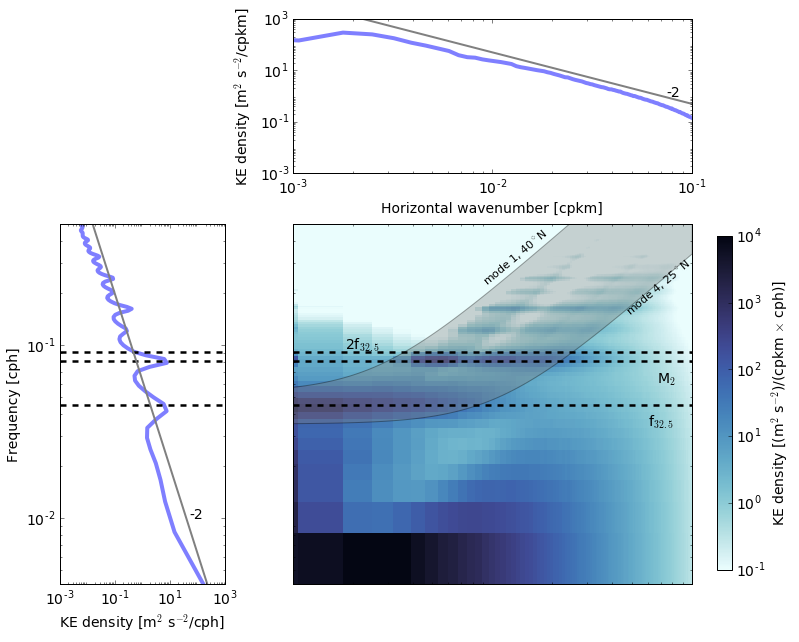

In [39]:
fig = plt.figure(figsize=(10,9))

ax1 = plt.subplot2grid((3,3),(0,1),colspan=2)
ax2 = plt.subplot2grid((3,3),(1,0),rowspan=2)
ax3 = plt.subplot2grid((3,3),(1,1),rowspan=2, colspan=2)

# ax1: pcolormesh wavenumber spectrum
cp = plt.pcolormesh(ki4320,f4320,E4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)

ax3.fill_between(k, omg_4_min, omg_1_max, facecolor='.5',alpha=.35)
ax3.text(1./115,.425,r'mode 1, 40$^\circ$N',fontsize=11,rotation=40)
ax3.text(1./22,.285,r'mode 4, 25$^\circ$N',fontsize=11,rotation=40)
ax3.plot([1.e-3,1.e-1],[f0,f0],'k--')
ax3.plot([1.e-3,1.e-1],[m2,m2],'k--')
ax3.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--') 
ax3.text(1/15.,.75*m2,'M$_2$',fontsize=14)
ax3.text(1/16.5,.75*f0,'f$_{32.5}$',fontsize=14)
ax3.text(1./550,2.1*f0,'2f$_{32.5}$',fontsize=14)
ax3.set_xscale("log", nonposx='clip')
ax3.set_yscale("log", nonposx='clip')
ax3.set_xlim(1.e-3,1/5./2)
ax3.set_ylim(0,.5)
ax3.set_yticks([])
ax3.set_xticks([])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1., .11, 0.02, 0.515])
fig.colorbar(cp, cax=cbar_ax,label=label_KEspec)

# wavenumber spectrum
ax1.set_xlabel("Horizontal wavenumber [cpkm]")
ax1.loglog(ki4320,2*ke_k,linewidth=4,alpha=.5)
#ax1.loglog(ki4320,2*ke_k_sub,linewidth=4,alpha=.5)
#ax1.loglog(ki4320,2*ke_k_super,linewidth=4,alpha=.5)

ax1.set_xlim(1.e-3,1/5./2)
ax1.set_ylim(1.e-2,1.e3)
ax1.set_yticks([1.e-3,1.e-1,1e1])
ax1.set_ylabel(r"KE density [m$^2$ s$^{-2}$/cpkm]")
kr = np.array([1.e-3,1.])
ax1.loglog(kr,kr**-2/2e2,'0.5',linewidth=2)
ax1.text(.75e-1,9.5e-1,'-2',fontsize=14)
ax1.set_yticks([1.e-3,1.e-1,1e1,1e3])

# Frequency spectrum
ax2.set_ylabel("Frequency [cph]")
ax2.loglog(2*ke_f,f4320,linewidth=4,alpha=.5)
ax2.set_xlim(1.e-3,1.e3)
ax2.set_ylim(0.,.5)
ax2.set_xlabel(r"KE density [m$^2$ s$^{-2}$/cph]")
ax2.plot([1.e-3,1.e3],[f0,f0],'k--')
ax2.plot([1.e-3,1.e3],[m2,m2],'k--')
ax2.plot([1.e-3,1.e3],[2*f0,2*f0],'k--') 

fr = np.array([1.e-3,1.])
ax2.loglog(fr**-2/2.5e2,fr,'0.5',linewidth=2)
ax2.text(.5e2,1e-2,'-2',fontsize=14)
ax2.set_xticks([1.e-3,1.e-1,1e1,1e3])


plt.tight_layout()

plt.savefig(__figpath__+"KE_WavenumberFrequency_Spectrum_4320_And_Integrals.pdf",dpi=100,bbox_inches='tight')

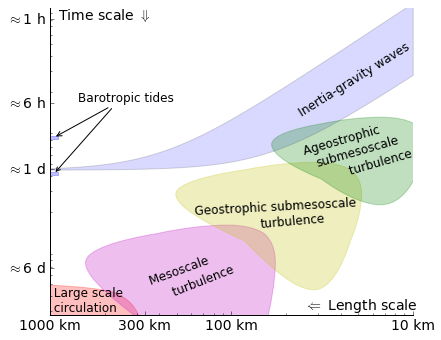

In [40]:
# plot the frame for schematics...
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)

#plt.plot(k,omg_3,'k')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)

# barotropic inertia-gravity waves
#plt.plot(k,omg_0)

plt.fill_between([1/1000,1./900],1/12.4,1/11.6,color='b',alpha=.25)
plt.fill_between([1/1000,1./900],1/24.8,1/23.2,color='b',alpha=.25)

ax.annotate("Barotropic tides",
            xy=(1/950.,1/12.), xycoords='data',
            xytext=(1/700, 1/6.), textcoords='data',fontsize=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("                 ",
            xy=(1/950.,1/24.), xycoords='data',
            xytext=(1/450, 1/6.7), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.fill_between(k, omg_4, omg_1, facecolor='b',alpha=.15)

f0, m2 = 1/22.,1./12.4
Ld =  300
plt.yticks([0.15*f0,f0,2*m2,10*m2],[r"$\approx$6 d",r"$\approx$1 d", r"$\approx$6 h",r"$\approx$1 h"])
plt.xticks([1/1000,1/300,1/100,1/10],["1000 km","300 km","100 km","10 km"])
#plt.xlabel("Lengh scale ")
#plt.ylabel("Time scale")
plt.ylim(1/24/15,1.)

large = plt.Circle((1/10000, 1/24/20), .0675*f0, color='r',alpha=.25)
meso = plt.Circle((1/105, 1/24/5.5), .175*f0, color='m',alpha=.25)
submesob = plt.Circle((1/35,.675/24), .52*f0, color='y',alpha=.25)
submesou = plt.Circle((1/15,1.75/24), 1.1*f0, color='g',alpha=.25)

ax.add_artist(large)
ax.add_artist(meso)
ax.add_artist(submesob)
ax.add_artist(submesou)
 
plt.text(1./72.5,.45,r'            Inertia-gravity waves',fontsize=12,rotation=32)
plt.text(1./1000,1/24/10.5,r' Large scale ',fontsize=12,rotation=0)
plt.text(1./1000,1/24/14,r' circulation ',fontsize=12,rotation=0)

plt.text(1./290,1/24/5.5,r'Mesoscale ',fontsize=12,rotation=20)
plt.text(1./260,1/24/6.5,r'    turbulence ',fontsize=12,rotation=21.5)

plt.text(1./160,1/24/1.85,r'Geostrophic submesoscale ',fontsize=12,rotation=3)
plt.text(1./70,1/24/2.5,r'turbulence',fontsize=12,rotation=5)
plt.text(1./45,1/24/.45,r'  Ageostrophic ',fontsize=12,rotation=16)
plt.text(1./35,1/24/.56,r'submesoscale',fontsize=12,rotation=16)
plt.text(1./25,1/24/.72,r'  turbulence',fontsize=12,rotation=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# arrows/labels
plt.text(1/40,1/24/13.5,r'$\Leftarrow$ Length scale',fontsize=14)
plt.text(1/900,1/1.25,r'Time scale $\Downarrow$ ',fontsize=14)

plt.savefig(__figpath__+"KE_Wavenumber-Frequency_Spectrum_frame.pdf",dpi=100,bbox_inches='tight')

In [41]:
re = 6371e3  # earth's radius
omg = 7.95e-5 # earth's rotation
latmin,latmax = 20, 40
beta_min, beta_max = 2*omg*np.cos(latmin*np.pi/180)/re, 2*omg*np.cos(latmax*np.pi/180)/re

romg_1 = (beta_max*k*(rd1_max**2)/(1 + (k*rd1_max)**2))*3600*1e3/2/np.pi  # [cph]

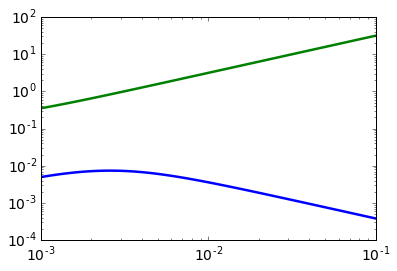

In [42]:
plt.loglog(k,romg_1/f0/2/np.pi)
plt.loglog(k,omg_0/f0/2/np.pi)

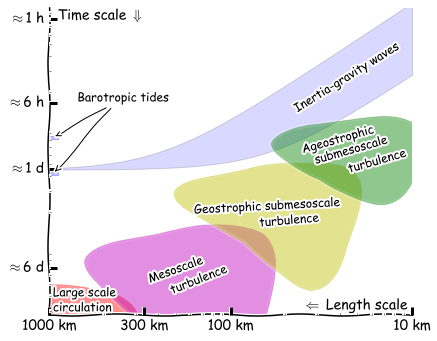

In [43]:
with plt.xkcd():
    # plot the frame for schematics...
    fig = plt.figure(figsize=(6.5,5.5))
    ax = plt.subplot(111)

    #plt.plot(k,omg_3,'k')
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposx='clip')
    plt.xlim(1.e-3,1/5./2)

    # barotropic inertia-gravity waves
    #plt.plot(k,omg_0)

    plt.fill_between([1/1000,1./900],1/12.4,1/11.6,color='b',alpha=.25)
    plt.fill_between([1/1000,1./900],1/24.8,1/23.2,color='b',alpha=.25)

    ax.annotate("Barotropic tides",
                xy=(1/950.,1/12.), xycoords='data',
                xytext=(1/700, 1/6.), textcoords='data',fontsize=12,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )
    ax.annotate("                 ",
                xy=(1/950.,1/24.), xycoords='data',
                xytext=(1/450, 1/6.7), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )

    plt.fill_between(k, omg_4, omg_1, facecolor='b',alpha=.15)

    f0, m2 = 1/22.,1./12.4
    Ld =  300
    plt.yticks([0.15*f0,f0,2*m2,10*m2],[r"$\approx$6 d",r"$\approx$1 d", r"$\approx$6 h",r"$\approx$1 h"])
    plt.xticks([1/1000,1/300,1/100,1/10],["1000 km","300 km","100 km","10 km"])
    #plt.xlabel("Lengh scale ")
    #plt.ylabel("Time scale")
    plt.ylim(1/24/15,1.)

    large = plt.Circle((1/10000, 1/24/20), .0675*f0, color='r',alpha=.25)
    meso = plt.Circle((1/105, 1/24/5.5), .175*f0, color='m',alpha=.25)
    submesob = plt.Circle((1/35,.675/24), .52*f0, color='y',alpha=.25)
    submesou = plt.Circle((1/15,1.75/24), 1.1*f0, color='g',alpha=.25)

    ax.add_artist(large)
    ax.add_artist(meso)
    ax.add_artist(submesob)
    ax.add_artist(submesou)

    plt.text(1./72.5,.45,r'            Inertia-gravity waves',fontsize=12,rotation=32)
    plt.text(1./1000,1/24/10.5,r' Large scale ',fontsize=12,rotation=0)
    plt.text(1./1000,1/24/14,r' circulation ',fontsize=12,rotation=0)

    plt.text(1./290,1/24/5.5,r'Mesoscale ',fontsize=12,rotation=20)
    plt.text(1./260,1/24/6.5,r'    turbulence ',fontsize=12,rotation=21.5)

    plt.text(1./160,1/24/1.85,r'Geostrophic submesoscale ',fontsize=12,rotation=3)
    plt.text(1./70,1/24/2.5,r'turbulence',fontsize=12,rotation=5)
    plt.text(1./45,1/24/.45,r'  Ageostrophic ',fontsize=12,rotation=16)
    plt.text(1./35,1/24/.56,r'submesoscale',fontsize=12,rotation=16)
    plt.text(1./25,1/24/.72,r'  turbulence',fontsize=12,rotation=16)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    # arrows/labels
    plt.text(1/40,1/24/13.5,r'$\Leftarrow$ Length scale',fontsize=14)
    plt.text(1/900,1/1.25,r'Time scale $\Downarrow$ ',fontsize=14)

    # arrows
    plt.arrow(1/10, 1/24/30, 1. , 2., head_width=0.05, head_length=0.1, fc='k', ec='k')
    
    plt.savefig(__figpath__+"KE_Wavenumber-Frequency_Spectrum_frame_xkcd.pdf",dpi=100,bbox_inches='tight')